# What is the sociodemographic composition of the European Parliament?

Data source: European Parliament

URL -- full list of the MEPs: http://www.europarl.europa.eu/meps/en/full-list/all

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode,plot,iplot
import folium
pyo.init_notebook_mode(connected=True)
cf.go_offline()

import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import xml.etree.ElementTree as et
import time
import dateutil
from datetime import datetime
from dateutil.relativedelta import relativedelta
from functools import reduce
import joypy
import seaborn as sns
import re

pd.set_option('max.rows', 800)

meps = pd.read_csv('data/DODS-EU_MEPwDoB-20190627-updated.csv', delimiter='\t')
meps.head()

In [2]:
meps = pd.read_csv('data/DODS-EU_MEPwDoB-20190627-updated.csv', delimiter='\t')
meps.head()

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation
0,29.0,9.0,1936.0,29.09.36,Silvio Berlusconi,M,Italy,Forward Italy,FI,European People's Party,EPP
1,3.0,7.0,1940.0,03.07.40,Jerzy Karol Buzek,M,Poland,Civic Platform,PO,European People's Party,EPP
2,24.0,8.0,1971.0,24.08.71,Aileen McLeod,F,United Kingdom,Scottish National Party,SNP,Greens-European Free Alliance,Greens-EFA
3,18.0,5.0,1976.0,18.05.76,Abir Al-Sahlani,F,Sweden,Centre Party,C,Renew Europe,RE
4,13.0,8.0,1944.0,13.08.44,José Manuel García-Margallo y Marfil,M,Spain,People's Party,PP,European People's Party,EPP


In [3]:
meps.info()
len(meps)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Day                                654 non-null    float64
 1   Month                              661 non-null    float64
 2   Year                               730 non-null    float64
 3   DoB                                654 non-null    object 
 4   Full_name                          748 non-null    object 
 5   Gender                             748 non-null    object 
 6   Country                            748 non-null    object 
 7   National_Party                     748 non-null    object 
 8   National_Party_Abbreviation        746 non-null    object 
 9   European_Party_Group               748 non-null    object 
 10  European_Party_Group_Abbreviation  748 non-null    object 
dtypes: float64(3), object(8)
memory usage: 64.4+ KB


748

In [4]:
# change column names 'only for calling'
ep_group = 'European_Party_Group_Abbreviation'
birthday = 'DoB'
birthyear = 'Year'
gender = 'Gender'
name = 'Full_name'
country = 'Country'

# variable names
female = 'F'
male = 'M'

# check whether gender value counts encompasses only binary options
# if not, go back to dataset to change input data
meps[gender].value_counts()

M    446
F    302
Name: Gender, dtype: int64

In [5]:
# check for MEPs without group affiliation
meps[meps[ep_group]=='TBC']

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation
602,28.0,8.0,1990.0,28.08.90,Ivan Vilibor Sinčić,M,Croatia,Human Shield,ŽZ,Party Group To Be Confirmed,TBC


In [6]:
# check number of MEPs per country
meps[country].value_counts()

Germany           96
France            74
Italy             73
United Kingdom    73
Poland            51
Spain             51
Romania           32
Netherlands       26
Belgium           21
Greece            21
Portugal          21
Czech Republic    21
Hungary           21
Sweden            20
Austria           18
Bulgaria          17
Denmark           13
Finland           13
Slovakia          13
Lithuania         11
Croatia           11
Ireland           11
Latvia             8
Slovenia           8
Luxembourg         6
Cyprus             6
Malta              6
Estonia            6
Name: Country, dtype: int64

In [7]:
meps[ep_group].value_counts()

EPP           182
SD            152
RE            109
Greens-EFA     76
ID             73
ECR            62
EFDD           43
GUE-NGL        40
NI             10
TBC             1
Name: European_Party_Group_Abbreviation, dtype: int64

## Age structure of different parties 

In [8]:
# check for NaNs -- in case of existing, go back to dataset and add by manual research
meps[meps[birthday].isnull()]

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation
5,NaN,NaN,1968.0,NaN,Alexandra Geese,F,Germany,Alliance 90/The Greens,Grüne,Greens-European Free Alliance,Greens-EFA
13,NaN,NaN,1980.0,NaN,Anthony Hook,M,United Kingdom,Liberal Democrat,Lib Dem,Renew Europe,RE
30,NaN,NaN,NaN,NaN,Atije Alieva-Veli,F,Bulgaria,Movement for Rights and Freedoms,DPS,Renew Europe,RE
35,NaN,NaN,NaN,NaN,Barbara Gibson,F,United Kingdom,Liberal Democrat,Lib Dem,Renew Europe,RE
58,NaN,NaN,1982.0,NaN,Anna Cavazzini,F,Germany,Alliance 90/The Greens,Grüne,Greens-European Free Alliance,Greens-EFA
102,NaN,NaN,NaN,NaN,Caroline Voaden,F,United Kingdom,Liberal Democrat,Lib Dem,Renew Europe,RE
169,NaN,NaN,NaN,NaN,Catherine Rowett,F,United Kingdom,Green Party,Green,Greens-European Free Alliance,Greens-EFA
209,NaN,NaN,1950.0,NaN,Dinesh Dhamija,M,United Kingdom,Liberal Democrat,Lib Dem,Renew Europe,RE
217,NaN,NaN,1985.0,NaN,Daniel Freund,M,Germany,Alliance 90/The Greens,Grüne,Greens-European Free Alliance,Greens-EFA
244,NaN,NaN,NaN,NaN,Ellie Chowns,F,United Kingdom,Green Party,Green,Greens-European Free Alliance,Greens-EFA


In [9]:
print('The full date of birth is not available for',len(meps[meps[birthday].isnull()]) , 'MEP.')

The full date of birth is not available for 94 MEP.


In [10]:
# for some MEP there is at least a year of birth - no age information is available for the following number of MEP
len(meps[meps[birthyear].isnull()])

18

In [11]:
# filter out NaN  'remove null birthyear, ep_group =TBC'
aged_meps = meps[(meps[birthyear].notnull())&(meps[ep_group]!='TBC')]

In [12]:
len(aged_meps)

729

In [13]:
# another easy solution to calculate age by years 
aged_meps['age_years'] = 2021- aged_meps['Year']
aged_meps.head()

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation,age_years
0,29.0,9.0,1936.0,29.09.36,Silvio Berlusconi,M,Italy,Forward Italy,FI,European People's Party,EPP,85.0
1,3.0,7.0,1940.0,03.07.40,Jerzy Karol Buzek,M,Poland,Civic Platform,PO,European People's Party,EPP,81.0
2,24.0,8.0,1971.0,24.08.71,Aileen McLeod,F,United Kingdom,Scottish National Party,SNP,Greens-European Free Alliance,Greens-EFA,50.0
3,18.0,5.0,1976.0,18.05.76,Abir Al-Sahlani,F,Sweden,Centre Party,C,Renew Europe,RE,45.0
4,13.0,8.0,1944.0,13.08.44,José Manuel García-Margallo y Marfil,M,Spain,People's Party,PP,European People's Party,EPP,77.0


## Parliament overall age specs

In [14]:
aged_meps['age_years'].describe()

count    729.000000
mean      52.603567
std       11.069115
min       23.000000
25%       45.000000
50%       53.000000
75%       61.000000
max       85.000000
Name: age_years, dtype: float64

## Age specs by party 

In [15]:
mean = aged_meps.groupby(by=ep_group)['age_years'].mean().reset_index(name='mean_age')
median = aged_meps.groupby(by=ep_group)['age_years'].median().reset_index(name='median_age')
youngest = aged_meps.groupby(by=ep_group)['age_years'].min().reset_index(name='age_youngest_mep')
oldest = aged_meps.groupby(by=ep_group)['age_years'].max().reset_index(name='age_oldest_mep')

In [16]:
# merge 4 stat
age_structure_EP_parties=youngest.merge(mean,on='European_Party_Group_Abbreviation').merge(median,on='European_Party_Group_Abbreviation').merge(oldest,on='European_Party_Group_Abbreviation')
age_structure_EP_parties

,European_Party_Group_Abbreviation,age_youngest_mep,mean_age,median_age,age_oldest_mep
0,ECR,36.0,57.193548,58.0,76.0
1,EFDD,32.0,50.135135,52.0,74.0
2,EPP,29.0,53.626374,53.0,85.0
3,GUE-NGL,32.0,50.100000,48.5,68.0
4,Greens-EFA,23.0,49.736111,50.0,80.0
5,ID,26.0,52.630137,54.0,73.0
6,NI,36.0,50.000000,49.0,67.0
7,RE,31.0,51.155340,50.0,80.0
8,SD,28.0,53.251656,54.0,75.0


In [17]:
px.scatter(age_structure_EP_parties,x=['age_youngest_mep','mean_age','median_age','age_oldest_mep'],y='European_Party_Group_Abbreviation',title='age distribution across European political parties')

In [18]:
age_structure_EP_parties.iplot(kind='scatter',y=['age_youngest_mep','mean_age','median_age','age_oldest_mep'],x='European_Party_Group_Abbreviation',title='age distribution across European political parties')

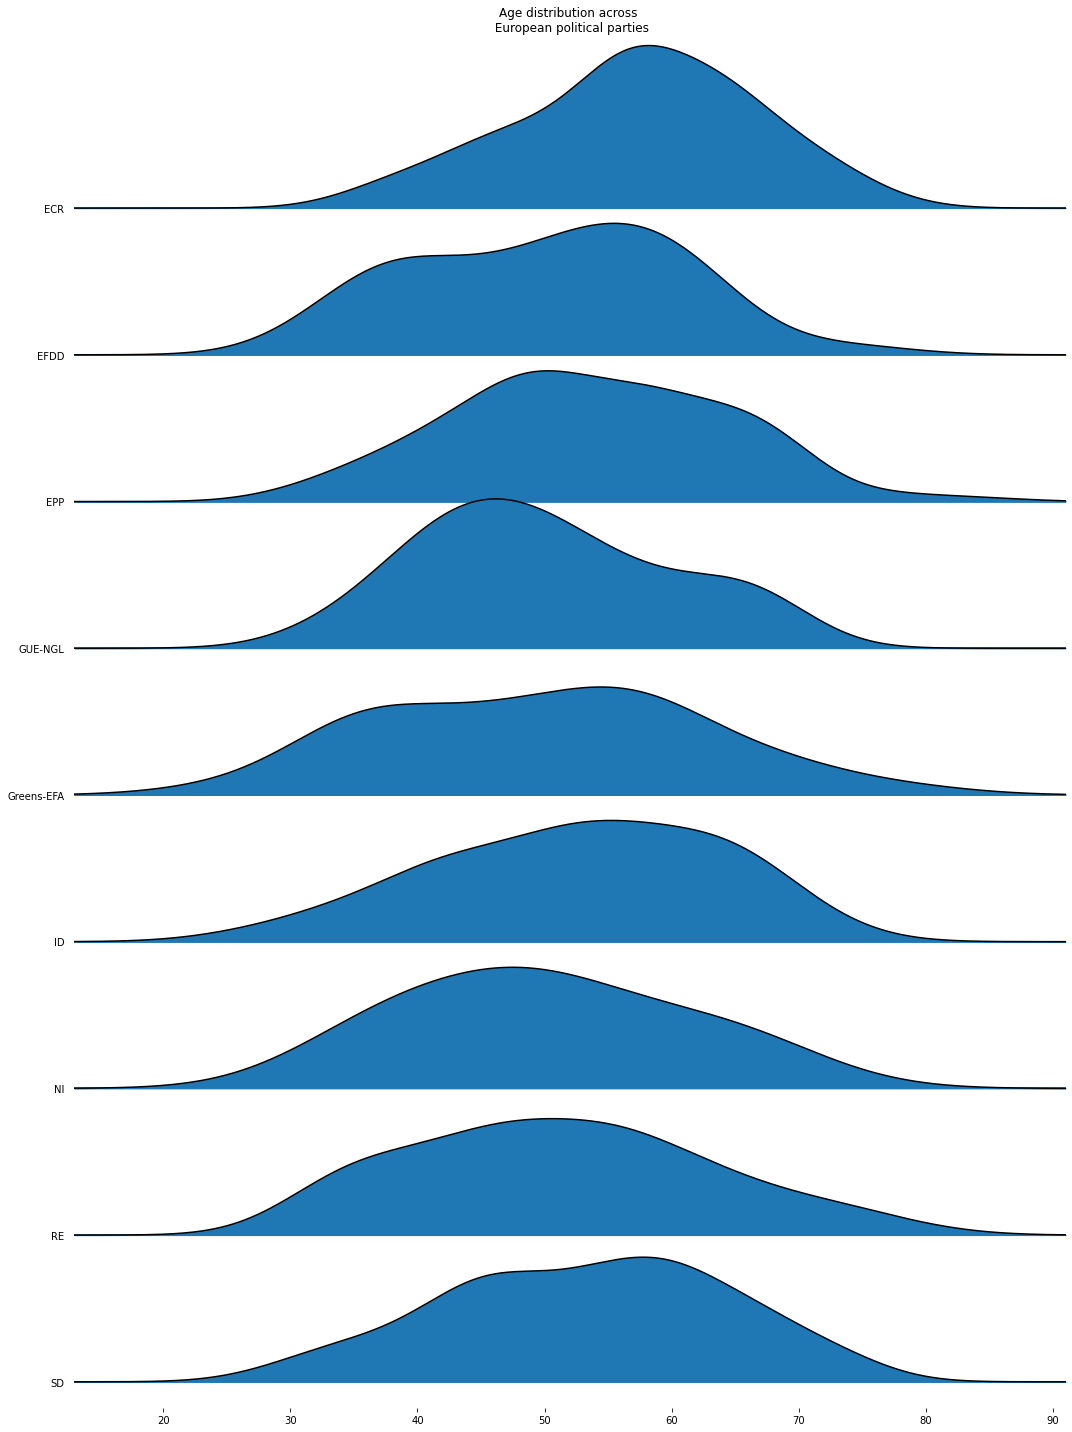

In [19]:
# http://sbebo.github.io/blog/blog/2017/08/01/joypy/
# https://www.pydoc.io/pypi/joypy-0.1.3/autoapi/joyplot/index.html
fig, axes = joypy.joyplot(aged_meps, figsize=(15,20), by=ep_group, x_range = (13,91),range_style = "all",column = 'age_years',  legend=False, title="Age distribution across \n European political parties")
#plt.savefig('charts/drafts/MEP-age-distribution-joyplot.pdf', transparent = True)

C:\Users\Mahmoud Nasef\anaconda3\lib\site-packages\joypy\joyplot.py:522: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



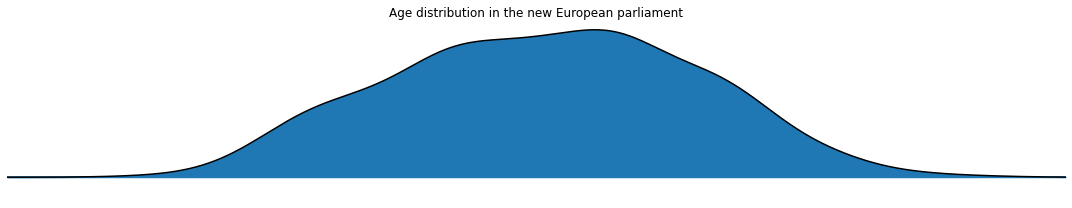

In [20]:
# Age distribution in the entire EP (irrespective of EP group)
fig, axes = joypy.joyplot(aged_meps, figsize=(15,3), x_range = (13,91),range_style = "all",column = 'age_years',  legend=False, title="Age distribution in the new European parliament")
# plt.savefig('charts/drafts/EP-age-distribution-ungrouped.pdf', transparent = True)


In [21]:
grouped_aged_meps = aged_meps.groupby(by=ep_group)
grouped_aged_meps['age_years'].min()

European_Party_Group_Abbreviation
ECR           36.0
EFDD          32.0
EPP           29.0
GUE-NGL       32.0
Greens-EFA    23.0
ID            26.0
NI            36.0
RE            31.0
SD            28.0
Name: age_years, dtype: float64

## Analyse gender balance 

In [22]:
meps.head()

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation
0,29.0,9.0,1936.0,29.09.36,Silvio Berlusconi,M,Italy,Forward Italy,FI,European People's Party,EPP
1,3.0,7.0,1940.0,03.07.40,Jerzy Karol Buzek,M,Poland,Civic Platform,PO,European People's Party,EPP
2,24.0,8.0,1971.0,24.08.71,Aileen McLeod,F,United Kingdom,Scottish National Party,SNP,Greens-European Free Alliance,Greens-EFA
3,18.0,5.0,1976.0,18.05.76,Abir Al-Sahlani,F,Sweden,Centre Party,C,Renew Europe,RE
4,13.0,8.0,1944.0,13.08.44,José Manuel García-Margallo y Marfil,M,Spain,People's Party,PP,European People's Party,EPP


In [23]:
ep_gender_balance = meps.groupby(by=gender)[country].count().reset_index(name='overall_gender_count')
female_meps_total = ep_gender_balance['overall_gender_count'][0]
male_meps_total = ep_gender_balance['overall_gender_count'][1]
total_meps = female_meps_total + male_meps_total
ep_gender_balance

,Gender,overall_gender_count
0,F,302
1,M,446


In [24]:
EP_2019_share_female = female_meps_total/total_meps*100
EP_2019_share_female

40.37433155080214

In [25]:
print('The share of female MEPs in the 2019 incoming European parliament is %', int(EP_2019_share_female))

The share of female MEPs in the 2019 incoming European parliament is % 40


In [26]:
meps_total = meps.groupby(by=ep_group)[name].count().reset_index(name='number_meps')
meps_total

,European_Party_Group_Abbreviation,number_meps
0,ECR,62
1,EFDD,43
2,EPP,182
3,GUE-NGL,40
4,Greens-EFA,76
5,ID,73
6,NI,10
7,RE,109
8,SD,152
9,TBC,1


In [27]:
meps_genders = meps.groupby(by=ep_group)[gender].value_counts().reset_index(name='gender_count')
meps_female = meps_genders[meps_genders[gender]==female]
meps_male = meps_genders[meps_genders[gender]==male]
meps_genders

,European_Party_Group_Abbreviation,Gender,gender_count
0,ECR,M,42
1,ECR,F,20
2,EFDD,M,27
3,EFDD,F,16
4,EPP,M,120
5,EPP,F,62
6,GUE-NGL,M,22
7,GUE-NGL,F,18
8,Greens-EFA,F,39
9,Greens-EFA,M,37


In [28]:
asd=meps_total.merge(meps_female,on='European_Party_Group_Abbreviation').merge(meps_male,on='European_Party_Group_Abbreviation')
gender_structure_EP_parties=asd.drop(['Gender_x','Gender_y'],axis=1)
gender_structure_EP_parties.columns =([ep_group,'number_meps','female_meps','male_meps'])
gender_structure_EP_parties

,European_Party_Group_Abbreviation,number_meps,female_meps,male_meps
0,ECR,62,20,42
1,EFDD,43,16,27
2,EPP,182,62,120
3,GUE-NGL,40,18,22
4,Greens-EFA,76,39,37
5,ID,73,29,44
6,NI,10,1,9
7,RE,109,52,57
8,SD,152,65,87


In [29]:
gender_structure_EP_parties['share_male %'] = round(gender_structure_EP_parties['male_meps']/gender_structure_EP_parties['number_meps']*100)
gender_structure_EP_parties['share_female %'] = round(gender_structure_EP_parties['female_meps']/gender_structure_EP_parties['number_meps']*100)
gender_structure_EP_parties['charting_male %'] = gender_structure_EP_parties['share_male %']*-1
gender_structure_EP_parties = gender_structure_EP_parties.sort_values(by='share_female %', ascending=True)
gender_structure_EP_parties

,European_Party_Group_Abbreviation,number_meps,female_meps,male_meps,share_male %,share_female %,charting_male %
6,NI,10,1,9,90.0,10.0,-90.0
0,ECR,62,20,42,68.0,32.0,-68.0
2,EPP,182,62,120,66.0,34.0,-66.0
1,EFDD,43,16,27,63.0,37.0,-63.0
5,ID,73,29,44,60.0,40.0,-60.0
8,SD,152,65,87,57.0,43.0,-57.0
3,GUE-NGL,40,18,22,55.0,45.0,-55.0
7,RE,109,52,57,52.0,48.0,-52.0
4,Greens-EFA,76,39,37,49.0,51.0,-49.0


In [30]:
px.bar(gender_structure_EP_parties,x=['share_female %','charting_male %'],y='European_Party_Group_Abbreviation',title='Gender distribution across European political parties')

In [31]:
gender_structure_EP_parties.iplot(kind='bar',y=['share_female %','charting_male %'],x='European_Party_Group_Abbreviation',title='Gender distribution across European political parties')

## analyse gender-by country

In [32]:
country_total = meps.groupby(by=country)[name].count().reset_index(name='number_meps')
country_total

,Country,number_meps
0,Austria,18
1,Belgium,21
2,Bulgaria,17
3,Croatia,11
4,Cyprus,6
5,Czech Republic,21
6,Denmark,13
7,Estonia,6
8,Finland,13
9,France,74


In [33]:
meps_genders = meps.groupby(by=country)[gender].value_counts().reset_index(name='gender_count')
meps_female = meps_genders[meps_genders[gender]==female]
meps_male = meps_genders[meps_genders[gender]==male]
meps_genders

,Country,Gender,gender_count
0,Austria,F,9
1,Austria,M,9
2,Belgium,M,13
3,Belgium,F,8
4,Bulgaria,M,12
5,Bulgaria,F,5
6,Croatia,M,7
7,Croatia,F,4
8,Cyprus,M,6
9,Czech Republic,M,14


In [34]:
asd=country_total.merge(meps_female,on='Country').merge(meps_male,on='Country')
gender_structure_countries_parties=asd.drop(['Gender_x','Gender_y'],axis=1)
gender_structure_countries_parties.columns =(['Country','number_meps','female_meps','male_meps'])
gender_structure_countries_parties

,Country,number_meps,female_meps,male_meps
0,Austria,18,9,9
1,Belgium,21,8,13
2,Bulgaria,17,5,12
3,Croatia,11,4,7
4,Czech Republic,21,7,14
5,Denmark,13,6,7
6,Estonia,6,2,4
7,Finland,13,7,6
8,France,74,37,37
9,Germany,96,35,61


In [35]:
gender_structure_countries_parties['share_male %'] = round(gender_structure_countries_parties['male_meps']/gender_structure_countries_parties['number_meps']*100)
gender_structure_countries_parties['share_female %'] = round(gender_structure_countries_parties['female_meps']/gender_structure_countries_parties['number_meps']*100)
gender_structure_countries_parties['charting_male %'] = gender_structure_countries_parties['share_male %']*-1
gender_structure_countries_parties = gender_structure_countries_parties.sort_values(by='share_female %', ascending=True)
gender_structure_countries_parties

,Country,number_meps,female_meps,male_meps,share_male %,share_female %,charting_male %
22,Slovakia,13,2,11,85.0,15.0,-85.0
21,Romania,32,7,25,78.0,22.0,-78.0
10,Greece,21,5,16,76.0,24.0,-76.0
15,Lithuania,11,3,8,73.0,27.0,-73.0
2,Bulgaria,17,5,12,71.0,29.0,-71.0
4,Czech Republic,21,7,14,67.0,33.0,-67.0
6,Estonia,6,2,4,67.0,33.0,-67.0
19,Poland,51,18,33,65.0,35.0,-65.0
9,Germany,96,35,61,64.0,36.0,-64.0
3,Croatia,11,4,7,64.0,36.0,-64.0


In [36]:
px.bar(gender_structure_countries_parties,x=['share_female %','charting_male %'],y='Country',title='MEP gender distribution across EU countries',width=1000, height=1000)

In [37]:
gender_structure_countries_parties.iplot(kind='bar',y=['share_female %','charting_male %'],x='Country',title='MEP gender distribution across EU countries')

## EP gender balance over time 

In [38]:
timeseries = pd.read_csv('data/GenderBalance-overtime.csv')
timeseries

,Opening_Session,Share_men,Share_women
0,1979,84,16
1,1984,82,18
2,1989,81,19
3,1994,74,26
4,1999,70,30
5,2004,69,31
6,2009,65,35
7,2014,63,37
8,2019,60,40


In [39]:
px.bar(timeseries,x='Opening_Session',y=['Share_men','Share_women'],title='EP gender balance over time ')

In [40]:
timeseries.iplot(kind='bar',y=['Share_men','Share_women'],x='Opening_Session',title='EP gender balance over time ')

In [41]:
timeseries.iplot(kind='scatter',y=['Share_men','Share_women'],x='Opening_Session',title='EP gender balance over time ')